In [1]:
from bpredict import *
import numpy as np
import matplotlib.pyplot as plt
import pickle

import pylab
pylab.rcParams['figure.figsize'] = (10, 6)

# blackscholes

In [ ]:
benchmark = '../benchmarks/blackscholes/blackscholes'
args = (1, '../benchmarks/blackscholes/inputs/small.input', '/dev/null')

blackscholes_pred = BasePredictor(record_trace=True)
blackscholes_runner = ExternalRunner(blackscholes_pred, benchmark, args=args, maxinsts=10**8)
blackscholes_runner.run()

In [2]:
if 'blackscholes_runner' and 'blackscholes_pred' in locals():
    print(blackscholes_runner.stats[0].find('sim_insts'))
    with open('blackscholes_trace.pickle', 'wb') as fp:
        pickle.dump(blackscholes_pred.trace, fp)
        blackscholes_trace = blackscholes_pred.trace
else:
    with open('blackscholes_trace.pickle', 'rb') as fp:
        blackscholes_trace = pickle.load(fp)

# PicoSAT

In [ ]:
benchmark = '../benchmarks/picosat/picosat'
args = ('../benchmarks/picosat/inputs/uuf200-01.cnf', )

picosat_pred = BasePredictor(record_trace=True)
picosat_runner = ExternalRunner(picosat_pred, benchmark, args=args, maxinsts=10**8)
picosat_runner.run()

In [3]:
if 'picosat_runner' and 'picosat_pred' in locals():
    print(picosat_runner.stats[0].find('sim_insts'))
    with open('picosat_trace.pickle', 'wb') as fp:
        pickle.dump(picosat_pred.trace, fp)
        picosat_trace = picosat_pred.trace
else:
    with open('picosat_trace.pickle', 'rb') as fp:
        picosat_trace = pickle.load(fp)

# Sjeng

In [ ]:
benchmark = '../benchmarks/sjeng/sjeng'
stdin = '\n'.join([
    'sd 8',
    'setboard 3r2k1/3n1ppp/p1p1b3/1nN1p3/2p1P3/Pr2BPP1/1P5P/3RRBK1 b - - 10 20',
    'quit'
])

sjeng_pred = BasePredictor(record_trace=True)
sjeng_runner = ExternalRunner(sjeng_pred, benchmark, stdin=stdin, maxinsts=10**8)
sjeng_runner.run()

In [4]:
if 'sjeng_runner' and 'sjeng_pred' in locals():
    print(sjeng_runner.stats[0].find('sim_insts'))
    with open('sjeng_trace.pickle', 'wb') as fp:
        pickle.dump(sjeng_pred.trace, fp)
        sjeng_trace = sjeng_pred.trace
else:
    with open('sjeng_trace.pickle', 'rb') as fp:
        sjeng_trace = pickle.load(fp)

# Analysis

In [5]:
def get_branch_histories(trace):
    histories = dict()
    for addr, taken in trace:
        if addr not in histories:
            histories[addr] = []
        histories[addr].append(taken)
    return sorted(map(np.array, histories.values()), key=len, reverse=True)

In [6]:
def plot_histograms(histories):
    branch_frequencies = list(map(len, histories))
    max_frequency = max(branch_frequencies)
    min_binsize = 10
    nbins = (np.ceil(np.log10(max_frequency)) - np.log10(min_binsize)) * 2 + 1
    bins = np.concatenate(([0], min_binsize * (10**(1/2))**np.arange(nbins)))

    hist, bins = np.histogram(branch_frequencies, bins=bins)

    plt.bar(np.arange(len(hist)), hist / sum(hist) * 100, width=-0.5, align='edge')
    plt.xticks(np.arange(len(hist)), map(int, bins[1:]))
    plt.title('Branch Frequency')
    plt.xlabel('#Times executed')
    plt.ylabel('% Instructions')
    plt.show()

    biases = list(map(lambda h: sum(h) / len(h), histories))
    hist, bins = np.histogram(biases, bins=np.linspace(0, 1, 20))

    plt.bar(bins[1:], hist / sum(hist) * 100, width=0.05)
    plt.title('Bias Distribution')
    plt.xlabel('Bias')
    plt.ylabel('% Instructions')
    plt.show()

In [7]:
sjeng_histories = get_branch_histories(sjeng_trace)

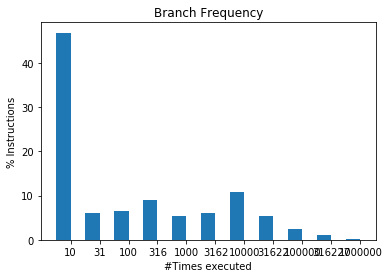

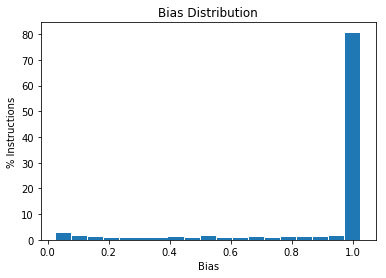

In [8]:
plot_histograms(sjeng_histories)

In [9]:
picosat_histories = get_branch_histories(picosat_trace)

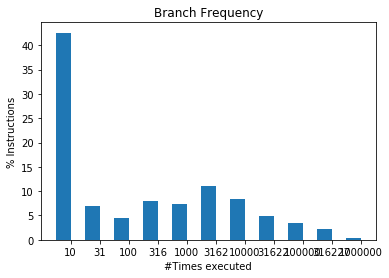

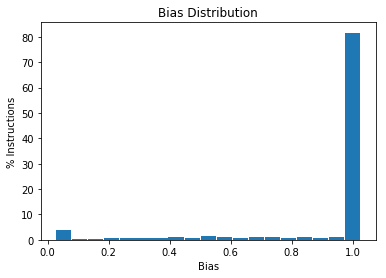

In [10]:
plot_histograms(picosat_histories)

In [11]:
blackscholes_histories = get_branch_histories(blackscholes_trace)

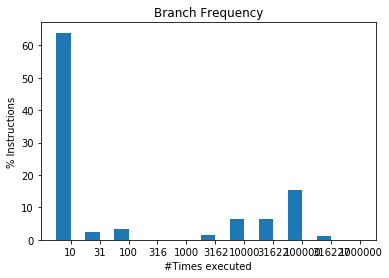

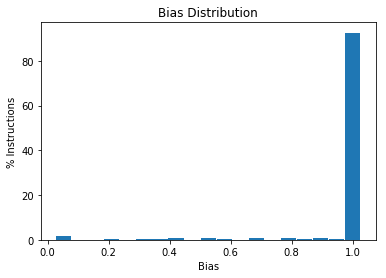

In [12]:
plot_histograms(blackscholes_histories)